# Kmeans
屬於EM(Expectation Maximization)演算法:  
- E: 期望值最大化。每一次求取期望值(平均數、質心)
- M: 依最大可能性(點對質心的距離)歸類樣本
- 持續循環。


作法:  
1. 選擇分成K類，並隨機取K個點作為集群中心  
2. 每一點分到最近的集群中心  
3. 重新計算各組集群中心，使用平均數
4. 重複2. 3.動作直到集群不變

## 步驟一:產生亂數資料
[make_blobs參考網站](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

C:\Anacoda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


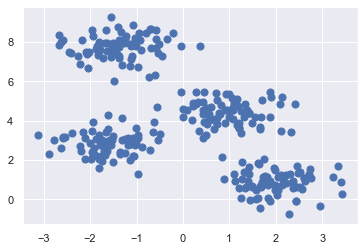

In [2]:
from sklearn.datasets.samples_generator import make_blobs
# make_blobs產生隨機資料
X, y_true = make_blobs(n_samples=300, centers=4,  # 隨機300筆資料，分4群
                       cluster_std=0.60, random_state=0)  #標準差0.6，亂數種子0
# X預設產生2個變數，若要2個以上，調整n_feature=參數
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
X.shape, y_true.shape

((300, 2), (300,))

300筆資料，2個變數

## 步驟二:使用Kmeans進行分類
[KMeans參考網站](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

非監督式學習一般不需要做資料切割，因為無標記(沒有y)，所以即使分出測試資料，也無法計算分數  

重要參數說明:
- n_clusters: 分成幾群  
- init: 起始值  
- max_iter: EM週期數  
- tol: 容忍度，當變動小於...時，停止。預設值為$10^{-4}$  
- precompute_distances: 距離函數

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4) #必填，分成4群。預設8群
kmeans.fit(X) #訓練
y_kmeans = kmeans.predict(X) #預測

In [5]:
# 查看真實值與預測值
y_true, y_kmeans

(array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
        0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
        2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
        3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
        3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
        2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
        2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
        1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
        1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
        2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
        3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
        1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
        3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
        3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 

In [6]:
# 查看兩組相同答案次數
len(y_true[y_true == y_kmeans])

75

兩組答案全部"沒有"符合  
原因為預測資料y_kmeans並未依y_true進行編碼。  
本例之狀況可能為y_true編號1，y_kmeans為3。

## 步驟三、查看兩組分類情形

#### 方法一

In [7]:
# 查詢y_true編碼為1之索引值
import pandas as pd
p=pd.Series(y_true)
print(p[p == 1].index)

Int64Index([  0,   4,   5,  14,  17,  20,  21,  26,  39,  49,  51,  53,  54,
             59,  67,  78,  80,  82,  83,  86,  91,  96,  97, 101, 103, 105,
            106, 112, 114, 117, 118, 121, 123, 124, 125, 126, 128, 133, 154,
            158, 163, 168, 172, 176, 177, 180, 188, 202, 217, 218, 221, 222,
            224, 233, 236, 240, 242, 252, 257, 258, 263, 269, 270, 274, 275,
            276, 280, 281, 283, 284, 285, 290, 291, 295, 296],
           dtype='int64')


In [8]:
# 查詢y_kmeans編碼為3之索引值
p2=pd.Series(y_kmeans)
#print(p2)
print(p2[p2 == 3].index)

Int64Index([  1,   3,   8,   9,  11,  13,  30,  31,  33,  34,  35,  36,  37,
             46,  48,  52,  56,  58,  60,  62,  66,  68,  72,  75,  79,  84,
             88,  89,  92, 100, 102, 108, 113, 116, 130, 134, 137, 139, 140,
            146, 148, 149, 150, 152, 156, 160, 171, 175, 189, 199, 205, 207,
            209, 214, 220, 227, 228, 231, 238, 243, 244, 245, 246, 249, 259,
            264, 267, 278, 279, 286, 288, 292, 293, 294, 298],
           dtype='int64')


In [9]:
# (y_true==1) == (y_kmeans==3) 
np.all(np.array(np.where(y_true==1))==np.array(np.where(y_kmeans==3)))

False

y_true=1與y_kmeans=3之索引值完全相同

#### 方法二

In [10]:
print([i for i, j in enumerate(y_true) if j==1])

[0, 4, 5, 14, 17, 20, 21, 26, 39, 49, 51, 53, 54, 59, 67, 78, 80, 82, 83, 86, 91, 96, 97, 101, 103, 105, 106, 112, 114, 117, 118, 121, 123, 124, 125, 126, 128, 133, 154, 158, 163, 168, 172, 176, 177, 180, 188, 202, 217, 218, 221, 222, 224, 233, 236, 240, 242, 252, 257, 258, 263, 269, 270, 274, 275, 276, 280, 281, 283, 284, 285, 290, 291, 295, 296]


In [11]:
print([i for i, j in enumerate(y_kmeans) if j==3])

[1, 3, 8, 9, 11, 13, 30, 31, 33, 34, 35, 36, 37, 46, 48, 52, 56, 58, 60, 62, 66, 68, 72, 75, 79, 84, 88, 89, 92, 100, 102, 108, 113, 116, 130, 134, 137, 139, 140, 146, 148, 149, 150, 152, 156, 160, 171, 175, 189, 199, 205, 207, 209, 214, 220, 227, 228, 231, 238, 243, 244, 245, 246, 249, 259, 264, 267, 278, 279, 286, 288, 292, 293, 294, 298]


In [12]:
[i for i, j in enumerate(y_true) if j==1] == [i for i, j in enumerate(y_kmeans) if j==3]

False

y_true=1與y_kmeans=3之索引值完全相同

## 步驟四: 結果

In [13]:
# 4個質心(x,y)
kmeans.cluster_centers_

array([[-1.58438467,  2.83081263],
       [ 0.94973532,  4.41906906],
       [ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871]])

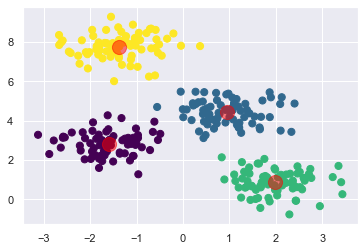

In [14]:
# 繪圖: 散佈圖
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# 質心
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In [15]:
# 誤差平方和: 每個點到質心距離之和，越小越好
kmeans.inertia_

212.00599621083472

In [16]:
# 循環次數
kmeans.n_iter_

3

In [17]:
# 訓練樣本結果分類
kmeans.labels_

array([2, 3, 1, 3, 2, 2, 0, 1, 3, 3, 0, 3, 1, 3, 2, 1, 1, 2, 0, 0, 2, 2,
       1, 0, 0, 1, 2, 1, 0, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 2, 1, 0, 1, 1,
       0, 0, 3, 0, 3, 2, 0, 2, 3, 2, 2, 0, 3, 0, 3, 2, 3, 1, 3, 0, 0, 0,
       3, 2, 3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 2, 3, 2, 1, 2, 2, 3, 1, 2, 1,
       3, 3, 1, 2, 3, 0, 0, 1, 2, 2, 1, 0, 3, 2, 3, 2, 1, 2, 2, 1, 3, 1,
       0, 0, 2, 3, 2, 1, 3, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0,
       0, 2, 3, 0, 0, 3, 1, 3, 3, 0, 1, 0, 1, 0, 3, 1, 3, 3, 3, 1, 3, 1,
       2, 0, 3, 0, 2, 1, 3, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 3, 2, 1, 0, 3,
       2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 3, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 3, 1, 0, 2, 0, 1, 3, 0, 3, 1, 3, 1, 0, 1, 1, 3, 0, 0, 2, 2, 1,
       3, 2, 2, 0, 2, 0, 1, 3, 3, 1, 1, 3, 1, 2, 0, 1, 2, 0, 3, 0, 2, 1,
       2, 3, 3, 3, 3, 0, 0, 3, 1, 0, 2, 1, 0, 0, 0, 2, 2, 3, 1, 1, 0, 2,
       3, 0, 1, 3, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 3, 3, 2, 2, 1, 2, 2, 2,
       3, 0, 3, 1, 2, 2, 3, 3, 3, 2, 2, 1, 3, 0])

Kmeans困難:  
1. 起始點: 採kmeans++  
2. 分成...群: elbow、Silhouette、

接下來課程會進行說明